# Problem Statement

## loading the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

## loading the dataset

In [2]:
df_train=pd.read_csv('train.csv')

In [3]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## checking for the null values

In [4]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

## checking for the shape

In [5]:
df_train.shape

(8523, 12)

## checking fot the number of categorical features and numerical features in the dataset

In [235]:
print('The number of categorical features in the train dataset are',len(df_train.select_dtypes(include='object').columns))
print('The number of numerical features in the train dataset are',len(df_train.select_dtypes(include=('int64','float64','int32','float32')).columns))

The number of categorical features in the train dataset are 7
The number of numerical features in the train dataset are 5


## Treating the missing values

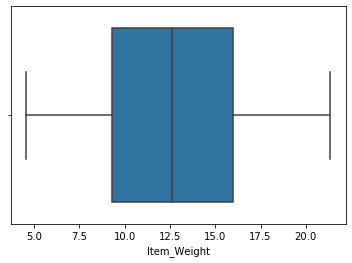

In [227]:
sns.boxplot(df_train['Item_Weight'])
plt.show()

### The Box Plots above clearly show no "Outliers" and hence we can impute the missing values with "Mean"

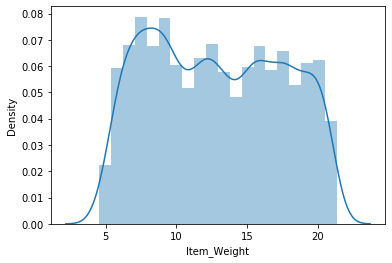

In [7]:
sns.distplot(df_train['Item_Weight'])
plt.show()

In [8]:
df_train['Item_Weight'].mean(),df_train['Item_Weight'].median(),df_train['Item_Weight'].mode()

(12.857645184136183,
 12.6,
 0    12.15
 dtype: float64)

## lets impute item_weight with mean

In [9]:
df_train['Item_Weight']=df_train['Item_Weight'].fillna(df_train['Item_Weight'].median())

In [10]:
df_train['Item_Weight'].isnull().sum()

0

## checking fot the Outlet_Size  feature

In [11]:
df_train['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [12]:
df_train['Outlet_Size'].mode()

0    Medium
dtype: object

## fill the missing values withd mode

In [13]:
df_train['Outlet_Size']=df_train['Outlet_Size'].fillna('Medium')

In [14]:
df_train['Outlet_Size'].isnull().sum()

0

## checking fot the datatypes

In [15]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## checking for the item identifier

In [16]:
df_train1=df_train.copy()

## lets drop the item identifier

In [17]:
df_train1.drop('Item_Identifier',axis=1,inplace=True)

## Item_Fat_Content

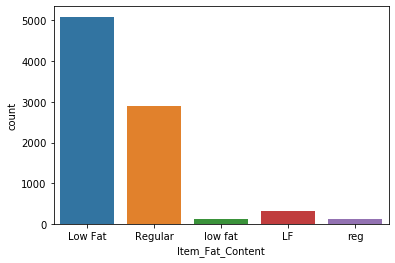

In [18]:
sns.countplot(df_train1['Item_Fat_Content'])
plt.show()

## some irregularities are found in column so we need to fix them

In [243]:
#df_train['Item_Fat_Content']=df_train1['Item_Fat_Content'].astype('object')

In [245]:
df_train['Item_Fat_Content']=df_train['Item_Fat_Content'].replace({'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'})

In [246]:
df_train['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

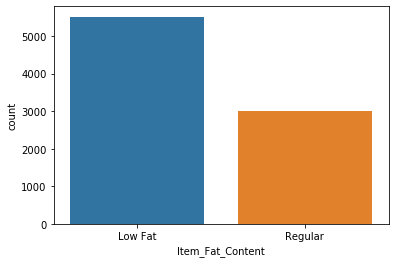

In [248]:
sns.countplot(df_train['Item_Fat_Content'])
plt.show()

## The items bought are more of low fat

## lets label encode the feature

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
lab_enc=LabelEncoder()

In [21]:
df_train1['Item_Fat_Content']=lab_enc.fit_transform(df_train1['Item_Fat_Content'])

In [22]:
df_train1['Item_Fat_Content'].value_counts()

1    5089
2    2889
0     316
4     117
3     112
Name: Item_Fat_Content, dtype: int64

## item type

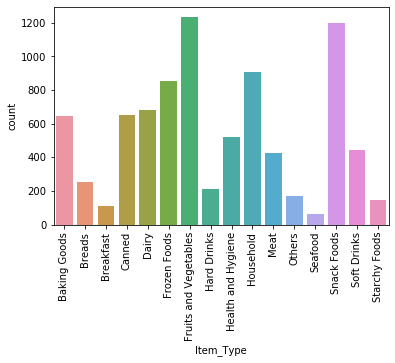

In [33]:
sns.countplot(df_train1['Item_Type'].sort_values(ascending=True))
plt.xticks(rotation=90)
plt.show()

### Fruits, vegetables are largely sold as they are being used on daily purpose
### snack foods are also having good sales

In [42]:
df_item_type_value_counts=pd.DataFrame(df_train1['Item_Type'].value_counts())

In [43]:
df_item_type_value_counts.head()

,Item_Type
Fruits and Vegetables,1232
Snack Foods,1200
Household,910
Frozen Foods,856
Dairy,682


In [75]:
list1=list(df_item_type_value_counts.index)
list2=list(df_item_type_value_counts.Item_Type)

In [84]:
dict_item_list=dict(zip(list1,list2))

In [88]:
dict_item_list

{'Fruits and Vegetables': 1232,
 'Snack Foods': 1200,
 'Household': 910,
 'Frozen Foods': 856,
 'Dairy': 682,
 'Canned': 649,
 'Baking Goods': 648,
 'Health and Hygiene': 520,
 'Soft Drinks': 445,
 'Meat': 425,
 'Breads': 251,
 'Hard Drinks': 214,
 'Others': 169,
 'Starchy Foods': 148,
 'Breakfast': 110,
 'Seafood': 64}

In [110]:
j=16
for i in dict_item_list:
    
    dict_item_list[i]=j
    j=j-1

In [111]:
dict_item_list

{'Fruits and Vegetables': 16,
 'Snack Foods': 15,
 'Household': 14,
 'Frozen Foods': 13,
 'Dairy': 12,
 'Canned': 11,
 'Baking Goods': 10,
 'Health and Hygiene': 9,
 'Soft Drinks': 8,
 'Meat': 7,
 'Breads': 6,
 'Hard Drinks': 5,
 'Others': 4,
 'Starchy Foods': 3,
 'Breakfast': 2,
 'Seafood': 1}

In [112]:
df_train1['Item_Type']=df_train1['Item_Type'].map(dict_item_list)

In [113]:
df_train1['Item_Type'].head()

0    12
1     8
2     7
3    16
4    14
Name: Item_Type, dtype: int64

## Outlet_Identifier

In [114]:
df_train1['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT035    930
OUT049    930
OUT046    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

## label ecnoding the Outlet_Identifier

In [115]:
df_train1['Outlet_Identifier']=lab_enc.fit_transform(df_train1['Outlet_Identifier'])

In [116]:
df_train1['Outlet_Identifier'].head()

0    9
1    3
2    9
3    0
4    1
Name: Outlet_Identifier, dtype: int32

## Outlet_Size

In [118]:
df_train['Outlet_Size'].value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

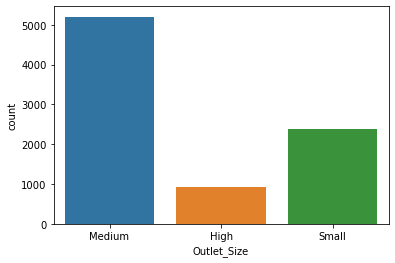

In [249]:
sns.countplot(df_train['Outlet_Size'])
plt.show()

## most of the outlets are medium sized

In [120]:
df_train1['Outlet_Size']=df_train1['Outlet_Size'].replace({'Medium':3,'Small':2,'High':1})

In [121]:
df_train1['Outlet_Size'].head()

0    3
1    3
2    3
3    3
4    1
Name: Outlet_Size, dtype: int64

## Outlet_Location_Type

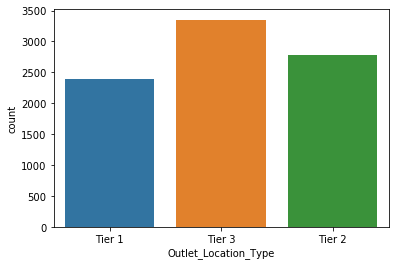

In [250]:
sns.countplot(df_train['Outlet_Location_Type'])
plt.show()

## most of the outlets are present in the tier3 locations

In [123]:
df_train1['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [124]:
df_train1['Outlet_Location_Type']=df_train1['Outlet_Location_Type'].replace({'Tier 3':3,'Tier 2':2,'Tier 1':1})

In [125]:
df_train1['Outlet_Location_Type'].value_counts()

3    3350
2    2785
1    2388
Name: Outlet_Location_Type, dtype: int64

### Outlet_Type

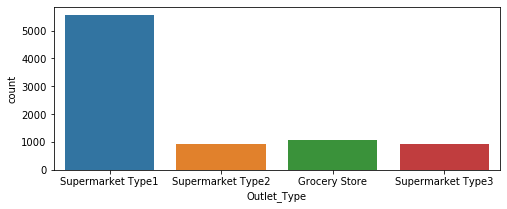

In [255]:
plt.figure(figsize=(8,3))
sns.countplot(df_train['Outlet_Type'])
plt.show()

## most of the outlet type are super market1

In [127]:
df_train1['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [130]:
df_train1['Outlet_Type']=df_train1['Outlet_Type'].replace({'Supermarket Type1':4,'Grocery Store':3,'Supermarket Type3':2,'Supermarket Type2':1})

In [131]:
df_train1['Outlet_Type'].value_counts()

4    5577
3    1083
2     935
1     928
Name: Outlet_Type, dtype: int64

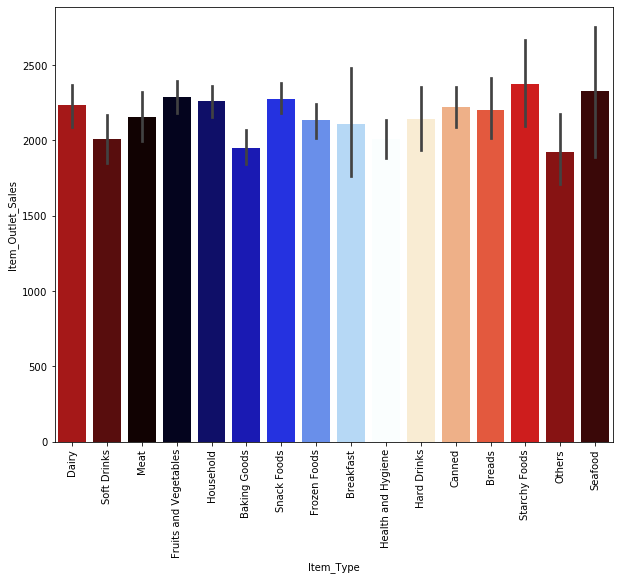

In [259]:
plt.figure(figsize=(10,8))
sns.barplot(df_train['Item_Type'],df_train['Item_Outlet_Sales'],palette='flag')
plt.xticks(rotation=90)
plt.show()

### The products available were Fruits-Veggies and Snack Foods but the sales of Seafood and Starchy Foods seems higher and hence the sales can be improved with having stock of products that are most bought by customers.

## base modelling

In [132]:
df_train1.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,1,0.016047,12,249.8092,9,1999,3,1,4,3735.1380
1,5.92,2,0.019278,8,48.2692,3,2009,3,3,1,443.4228
2,17.50,1,0.016760,7,141.6180,9,1999,3,1,4,2097.2700
3,19.20,2,0.000000,16,182.0950,0,1998,3,3,3,732.3800
4,8.93,1,0.000000,14,53.8614,1,1987,1,3,4,994.7052


In [133]:
from sklearn.preprocessing import MinMaxScaler

In [134]:
min_max=MinMaxScaler()

In [135]:
df_train1=min_max.fit_transform(df_train1)

In [139]:
list3=df_train.columns

In [147]:
list3=list3.delete(0)

In [148]:
df_train1=pd.DataFrame(df_train1,columns=list3)

In [149]:
df_train1.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0.282525,0.25,0.048866,0.733333,0.927507,1.000000,0.583333,1.0,0.0,1.000000,0.283587
1,0.081274,0.50,0.058705,0.466667,0.072068,0.333333,1.000000,1.0,1.0,0.000000,0.031419
2,0.770765,0.25,0.051037,0.400000,0.468288,1.000000,0.583333,1.0,0.0,1.000000,0.158115
3,0.871986,0.50,0.000000,1.000000,0.640093,0.000000,0.541667,1.0,1.0,0.666667,0.053555
4,0.260494,0.25,0.000000,0.866667,0.095805,0.111111,0.083333,0.0,1.0,1.000000,0.073651


## train test split

In [271]:
X=df_train1.drop('Item_Outlet_Sales',axis=1)
y=df_train1['Item_Outlet_Sales']

In [272]:
from sklearn.model_selection import train_test_split

In [278]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

## ml models

In [274]:
from sklearn.linear_model import Lasso,Ridge,LinearRegression

In [275]:
algos = [LinearRegression(),  Ridge(), Lasso(),
          KNeighborsRegressor(), DecisionTreeRegressor(),RandomForestRegressor,LGBMRegressor]

names = ['Linear Regression', 'Ridge Regression', 'Lasso Regression',
         'K Neighbors Regressor', 'Decision Tree Regressor','Random Forest Regressor','LGBM Regressor']

rmse_list = []

In [276]:
from sklearn.metrics import mean_squared_error

In [281]:
for name in algos:
    model = name()
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    MSE= mean_squared_error(y_test,y_pred)
    rmse = np.sqrt(MSE)
    rmse_list.append(rmse)

TypeError: 'LinearRegression' object is not callable

## linear regression

In [155]:
from sklearn.linear_model import LinearRegression

In [156]:
lin_reg=LinearRegression()

In [157]:
model=lin_reg.fit(X_train,y_train)

In [158]:
y_pred=model.predict(X_test)

In [161]:
from sklearn.metrics import accuracy_score,mean_absolute_error,mean_squared_error

In [169]:
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(np.sqrt(mean_squared_error(y_test,y_pred)))

0.05909919381788383
0.007161840210435164
0.08462765629766172


## Randomforest

In [165]:
from sklearn.ensemble import RandomForestRegressor

In [166]:
ran_for=RandomForestRegressor()

In [167]:
model=ran_for.fit(X_train,y_train)

In [168]:
y_pred=model.predict(X_test)

In [170]:
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(np.sqrt(mean_squared_error(y_test,y_pred)))

0.05909919381788383
0.007161840210435164
0.08462765629766172


## knn

In [172]:
from sklearn.neighbors import KNeighborsRegressor

In [173]:
knn=KNeighborsRegressor()

In [175]:
model=knn.fit(X_train,y_train)

In [177]:
y_pred=model.predict(X_test)

In [178]:
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(np.sqrt(mean_squared_error(y_test,y_pred)))

0.061883947170808806
0.007892204132054995
0.08883807816502445


## DEcision tree

In [179]:
from sklearn.tree import DecisionTreeRegressor

In [180]:
dec_tree=DecisionTreeRegressor()

In [181]:
model=dec_tree.fit(X_train,y_train)

In [183]:
y_pred=model.predict(X_test)

In [184]:
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(np.sqrt(mean_squared_error(y_test,y_pred)))

0.08066565014502258
0.013252795963625332
0.11512078858149527


## lgbm

In [185]:
from lightgbm import LGBMRegressor

In [186]:
lgb=LGBMRegressor()

In [187]:
model=lgb.fit(X_train,y_train)

In [188]:
y_pred=model.predict(X_test)

In [189]:
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(np.sqrt(mean_squared_error(y_test,y_pred)))

0.057252527181452774
0.006746343576416459
0.08213612832619066


## from the above all it was concluded that lgbm model is working well for the following use case

## Hyper parameter tuning

In [191]:
import optuna.integration.lightgbm as lgb

ModuleNotFoundError: No module named 'optuna'

In [192]:
pip install optuna


  Created wheel for alembic: filename=alembic-1.5.5-py2.py3-none-any.whl size=156604 sha256=5eed18b8fe042678d03605415d5dff07f367562b1dd095fdcc4d522a98a79979
  Stored in directory: c:\users\ksk\appdata\local\pip\cache\wheels\c5\2b\35\5137bd5fcdf420a9b7a2432817dc489dddc704cd87d29af726
  Created wheel for Mako: filename=Mako-1.1.4-py2.py3-none-any.whl size=75681 sha256=2f975bf59dd191406c803c4bf207db159afa6d77150aaad361ccaad112561712
  Stored in directory: c:\users\ksk\appdata\local\pip\cache\wheels\17\bc\50\621fe4100d907a7296cc00c21371402b068b648820f6ff5812
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11112 sha256=e5695f5cfcfb8d64b43f2fc03d43c334880ab4ffd58faf802fc7b4a3fc5065e7
  Stored in directory: c:\users\ksk\appdata\local\pip\cache\wheels\7f\1a\65\84ff8c386bec21fca6d220ea1f5498a0367883a78dd5ba6122
Successfully built alembic Mako pyperclip


In [194]:
import optuna.integration.lightgbm as lgb

## H20

In [197]:
import pandas as pd
import h2o
from h2o.automl import H2OAutoML

In [198]:
h2o.init(
    nthreads=-1,     # number of threads when launching a new H2O server
    max_mem_size=12  # in gigabytes
)

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.271-b09, mixed mode)
  Starting server from C:\Users\KSK\anaconda3\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\KSK\AppData\Local\Temp\tmpbsz_fbdn
  JVM stdout: C:\Users\KSK\AppData\Local\Temp\tmpbsz_fbdn\h2o_KSK_started_from_python.out
  JVM stderr: C:\Users\KSK\AppData\Local\Temp\tmpbsz_fbdn\h2o_KSK_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,05 secs
H2O_cluster_timezone:,Asia/Kolkata
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.0.2
H2O_cluster_version_age:,3 months and 3 days
H2O_cluster_name:,H2O_from_python_KSK_pnbw4l
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,10.67 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"accepting new members, healthy"


In [201]:
train = h2o.import_file("train.csv")
test = h2o.import_file("test.csv")

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [208]:
train_as_df = h2o.as_list(train,use_pandas=True)

In [209]:
train_as_df.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228


In [210]:
train = h2o.H2OFrame(train_as_df)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [211]:
round((train_as_df.isnull().sum() * 100/ len(train_as_df)),2).sort_values(ascending=False)

Outlet_Size                  28.28
Item_Weight                  17.17
Item_Outlet_Sales             0.00
Outlet_Type                   0.00
Outlet_Location_Type          0.00
Outlet_Establishment_Year     0.00
Outlet_Identifier             0.00
Item_MRP                      0.00
Item_Type                     0.00
Item_Visibility               0.00
Item_Fat_Content              0.00
Item_Identifier               0.00
dtype: float64

In [213]:
train = h2o.H2OFrame(train_as_df)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [214]:
x = train.columns
y = "Item_Outlet_Sales"
x.remove(y)

In [215]:
aml = H2OAutoML(max_models=10, seed=1)
aml.train(x=x, y=y, training_frame=train)

AutoML progress: |
13:21:04.327: AutoML: XGBoost is not available; skipping it.

████████████████████████████████████████████████████████| 100%


In [216]:
lb = aml.leaderboard
lb.head(rows=lb.nrows)

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
StackedEnsemble_BestOfFamily_AutoML_20210221_132104,1.16598e+06,1079.8,1.16598e+06,758.666,nan
StackedEnsemble_AllModels_AutoML_20210221_132104,1.16664e+06,1080.11,1.16664e+06,758.8,nan
GBM_grid__1_AutoML_20210221_132104_model_1,1.17164e+06,1082.42,1.17164e+06,758.741,0.54757
DeepLearning_1_AutoML_20210221_132104,1.19816e+06,1094.6,1.19816e+06,777.066,nan
XRT_1_AutoML_20210221_132104,1.22038e+06,1104.71,1.22038e+06,773.818,0.553855
GBM_1_AutoML_20210221_132104,1.22813e+06,1108.21,1.22813e+06,776.96,nan
GBM_5_AutoML_20210221_132104,1.23521e+06,1111.4,1.23521e+06,782.571,nan
GBM_2_AutoML_20210221_132104,1.23692e+06,1112.17,1.23692e+06,776.898,nan
DRF_1_AutoML_20210221_132104,1.24106e+06,1114.03,1.24106e+06,777.676,0.546914
GBM_3_AutoML_20210221_132104,1.2593e+06,1122.18,1.2593e+06,786.404,nan


In [217]:
preds = aml.leader.predict(test)

stackedensemble prediction progress: |████████████████████████████████████| 100%


In [218]:
df = test.cbind(preds)
df.head(2)

Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,predict
FDW58,20.75,Low Fat,0.00756484,Snack Foods,107.862,OUT049,1999,Medium,Tier 1,Supermarket Type1,1659.66
FDW14,8.3,reg,0.0384277,Dairy,87.3198,OUT017,2007,,Tier 2,Supermarket Type1,1419.91


In [219]:
res = df[:, ["Item_Identifier", "Outlet_Identifier","predict"]]
res.head(2)

Item_Identifier,Outlet_Identifier,predict
FDW58,OUT049,1659.66
FDW14,OUT017,1419.91


In [220]:
res.set_names(["Item_Identifier", "Outlet_Identifier","Item_Outlet_Sales"])

Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
FDW58,OUT049,1659.66
FDW14,OUT017,1419.91
NCN55,OUT010,817.91
FDQ58,OUT017,2565.1
FDY38,OUT027,5873.53
FDH56,OUT046,1991.93
FDL48,OUT018,718.992
FDC48,OUT027,2160.63
FDN33,OUT045,1547.34
FDA36,OUT017,3247.01


## Save Results

In [221]:
h2o.export_file(res, path = "submission_sasi.csv", force = True)

Export File progress: |███████████████████████████████████████████████████| 100%


## Save Leader Model

In [222]:
h2o.save_model(aml.leader, path = "h20_model")

'C:\\Users\\KSK\\Downloads\\Analytics vidya practice hack\\h20_model\\StackedEnsemble_BestOfFamily_AutoML_20210221_132104'

In [224]:
aml.leader.download_mojo(path = "h20_model")

'C:\\Users\\KSK\\Downloads\\Analytics vidya practice hack\\h20_model\\StackedEnsemble_BestOfFamily_AutoML_20210221_132104.zip'

## Ensemble Exploration

In [225]:
# Get model ids for all models in the AutoML Leaderboard
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])
# Get the "All Models" Stacked Ensemble model
se = h2o.get_model([mid for mid in model_ids if "StackedEnsemble_AllModels" in mid][0])
# Get the Stacked Ensemble metalearner model
metalearner = h2o.get_model(se.metalearner()['name'])

C:\Users\KSK\anaconda3\lib\site-packages\h2o\estimators\stackedensemble.py:800: H2ODeprecationWarning: The usage of stacked_ensemble.metalearner()['name'] will be deprecated. Metalearner now returns the metalearner object. If you need to get the 'name' please use stacked_ensemble.metalearner().model_id
  warnings.warn(


In [226]:
metalearner.coef_norm()

{'Intercept': 2181.2889135750183,
 'GBM_grid__1_AutoML_20210221_132104_model_1': 683.5492614130492,
 'DeepLearning_1_AutoML_20210221_132104': 417.02949820855304,
 'XRT_1_AutoML_20210221_132104': 172.53298947046653,
 'GBM_1_AutoML_20210221_132104': 0.0,
 'GBM_5_AutoML_20210221_132104': 44.907927524240115,
 'GBM_2_AutoML_20210221_132104': 0.0,
 'DRF_1_AutoML_20210221_132104': 0.0,
 'GBM_3_AutoML_20210221_132104': 10.377341219096518,
 'GBM_4_AutoML_20210221_132104': 0.0,
 'GLM_1_AutoML_20210221_132104': 0.0}